In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
file_path = "movies.csv"
movies_df = pd.read_csv(file_path)
print(movies_df.shape)


(9742, 3)


In [4]:
file_path = "ratings.csv"
ratings_df = pd.read_csv(file_path)
print(ratings_df.shape)


(100836, 4)


In [5]:
file_path = "ratings.csv"
ratings_df = pd.read_csv(file_path)

unique_user_ids = ratings_df['userId'].nunique()

print("Number of unique userId values:", unique_user_ids)


Number of unique userId values: 610


In [7]:
max_ratings_movie = ratings_df.groupby('movieId')['rating'].count().idxmax()
print("Movie with the maximum number of user ratings:", max_ratings_movie)


Movie with the maximum number of user ratings: 356


# merging all the dataset with primary key 

In [30]:
import pandas as pd
ratings_df = pd.read_csv('ratings.csv')
tags_df = pd.read_csv('tags.csv')
links_df = pd.read_csv('links.csv')
movies_df = pd.read_csv('movies.csv')

merged_df = pd.merge(ratings_df, tags_df, on='movieId', how='left')
merged_df = pd.merge(merged_df, links_df, on='movieId', how='left')

final_merged_df = pd.merge(merged_df, movies_df, on='movieId', how='left')

print(final_merged_df.head())


   userId_x  movieId  rating  timestamp_x  userId_y    tag   timestamp_y   
0         1        1     4.0    964982703     336.0  pixar  1.139046e+09  \
1         1        1     4.0    964982703     474.0  pixar  1.137207e+09   
2         1        1     4.0    964982703     567.0    fun  1.525286e+09   
3         1        3     4.0    964981247     289.0  moldy  1.143425e+09   
4         1        3     4.0    964981247     289.0    old  1.143425e+09   

   imdbId   tmdbId                    title   
0  114709    862.0         Toy Story (1995)  \
1  114709    862.0         Toy Story (1995)   
2  114709    862.0         Toy Story (1995)   
3  113228  15602.0  Grumpier Old Men (1995)   
4  113228  15602.0  Grumpier Old Men (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1  Adventure|Animation|Children|Comedy|Fantasy  
2  Adventure|Animation|Children|Comedy|Fantasy  
3                               Comedy|Romance  
4              

In [33]:
tags_df = pd.read_csv('tags.csv')
movies_df = pd.read_csv('movies.csv')

matrix_movie_id = movies_df[movies_df['title'] == 'Matrix, The (1999)']['movieId'].iloc[0]
matrix_tags = tags_df[tags_df['movieId'] == matrix_movie_id]['tag']
print(f"The tags for 'Matrix, The (1999)' are:")
print(matrix_tags.tolist())


The tags for 'Matrix, The (1999)' are:
['martial arts', 'sci-fi', 'alternate universe', 'philosophy', 'post apocalyptic']


In [34]:
import pandas as pd
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
terminator2_movie_id = movies_df[movies_df['title'] == 'Terminator 2: Judgment Day (1991)']['movieId'].iloc[0]
average_rating_terminator2 = ratings_df[ratings_df['movieId'] == terminator2_movie_id]['rating'].mean()
print(f"The average user rating for 'Terminator 2: Judgment Day (1991)' is: {average_rating_terminator2:.2f}")


The average user rating for 'Terminator 2: Judgment Day (1991)' is: 3.97


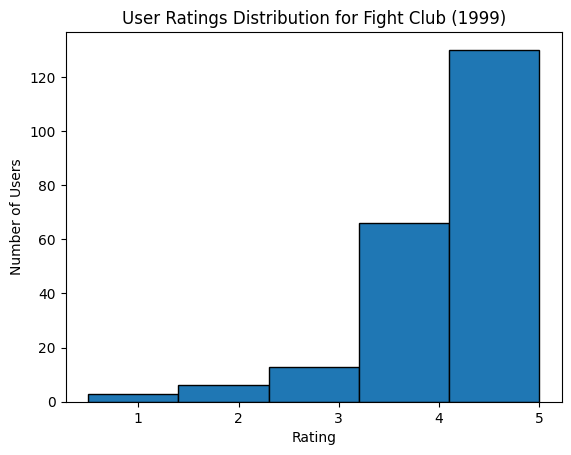

In [36]:
import pandas as pd
import matplotlib.pyplot as plt

ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

fight_club_movie_id = movies_df[movies_df['title'] == 'Fight Club (1999)']['movieId'].iloc[0]
fight_club_ratings = ratings_df[ratings_df['movieId'] == fight_club_movie_id]['rating']
plt.hist(fight_club_ratings, bins=5, edgecolor='black')
plt.title('User Ratings Distribution for Fight Club (1999)')
plt.xlabel('Rating')
plt.ylabel('Number of Users')
plt.show()


In [37]:
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')

average_ratings = ratings_df.groupby('movieId')['rating'].mean()

most_popular_movie_id = average_ratings.idxmax()

most_popular_movie_title = movies_df[movies_df['movieId'] == most_popular_movie_id]['title'].iloc[0]

print(f"The most popular movie based on average user ratings is: {most_popular_movie_title}")


The most popular movie based on average user ratings is: Lamerica (1994)


In [38]:
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
ratings_count = ratings_df['movieId'].value_counts()
top_5_movies = ratings_count.head(5)
top_5_movie_titles = movies_df[movies_df['movieId'].isin(top_5_movies.index)]['title']
print("Top 5 popular movies based on the number of user ratings:")
print(top_5_movie_titles.tolist())


Top 5 popular movies based on the number of user ratings:
['Pulp Fiction (1994)', 'Shawshank Redemption, The (1994)', 'Forrest Gump (1994)', 'Silence of the Lambs, The (1991)', 'Matrix, The (1999)']


In [39]:
ratings_df = pd.read_csv('ratings.csv')
movies_df = pd.read_csv('movies.csv')
merged_df = pd.merge(ratings_df, movies_df, on='movieId', how='left')
sci_fi_movies = merged_df[merged_df['genres'].str.contains('Sci-Fi')]

ratings_count_sci_fi = sci_fi_movies['movieId'].value_counts()
third_most_popular_sci_fi_movie_id = ratings_count_sci_fi.index[2]
third_most_popular_sci_fi_movie_title = movies_df[movies_df['movieId'] == third_most_popular_sci_fi_movie_id]['title'].iloc[0]

print(f"The third most popular Sci-Fi movie based on the number of user ratings is: {third_most_popular_sci_fi_movie_title}")


The third most popular Sci-Fi movie based on the number of user ratings is: Jurassic Park (1993)
